In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn as skn 
import re 
import os

In [2]:
cwd = os.getcwd()
files = os.listdir(cwd)
print("Files in %r: %s " % (cwd,files))

Files in '/Users/umutcandegirmenci/Portfolios/layoff 2024': ['.DS_Store', 'layoffs_data.csv', 'layof.ipynb'] 


In [3]:
df = pd.read_csv("layoffs_data.csv")
df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,True Anomaly,Denver,Aerospace,30.0,0.25,2024-04-25T00:00:00.000Z,https://techcrunch.com/2024/04/25/defense-spac...,158.0,Series B,2024-04-26T15:58:59.000Z,United States,Unknown
1,Grin,Sacramento,Marketing,NaN,NaN,2024-04-25T00:00:00.000Z,https://www.businessinsider.com/influencer-mar...,145.0,Series B,2024-04-27T00:09:09.000Z,United States,Unknown
2,Expedia,Austin,Travel,NaN,NaN,2024-04-24T00:00:00.000Z,https://www.bizjournals.com/austin/news/2024/0...,3300.0,Post-IPO,2024-04-25T16:09:19.000Z,United States,Unknown
3,Freenome,SF Bay Area,Healthcare,100.0,0.20,2024-04-23T00:00:00.000Z,https://www.sfchronicle.com/bayarea/article/te...,1400.0,Series E,2024-04-24T15:01:03.000Z,United States,Unknown
4,Heureka Group,Prague,Retail,100.0,0.16,2024-04-23T00:00:00.000Z,https://cc.cz/heureka-hromadne-propustila-stov...,NaN,Acquired,2024-04-24T15:06:41.000Z,Czech Republic,Unknown


In [4]:
for i in df.columns:
    print(i)

Company
Location_HQ
Industry
Laid_Off_Count
Percentage
Date
Source
Funds_Raised
Stage
Date_Added
Country
List_of_Employees_Laid_Off


In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577 entries, 0 to 3576
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     3577 non-null   object 
 1   Location_HQ                 3577 non-null   object 
 2   Industry                    3577 non-null   object 
 3   Laid_Off_Count              2342 non-null   float64
 4   Percentage                  2300 non-null   float64
 5   Date                        3577 non-null   object 
 6   Source                      3577 non-null   object 
 7   Funds_Raised                3194 non-null   float64
 8   Stage                       3577 non-null   object 
 9   Date_Added                  3577 non-null   object 
 10  Country                     3577 non-null   object 
 11  List_of_Employees_Laid_Off  3577 non-null   object 
dtypes: float64(3), object(9)
memory usage: 335.5+ KB


In [6]:
df.Stage.unique()

array(['Series B', 'Post-IPO', 'Series E', 'Acquired', 'Unknown',
       'Series D', 'Series C', 'Private Equity', 'Seed', 'Series A',
       'Subsidiary', 'Series F', 'Series H', 'Series G', 'Series I',
       'Series J'], dtype=object)

In [7]:
df.isna().sum()

Company                          0
Location_HQ                      0
Industry                         0
Laid_Off_Count                1235
Percentage                    1277
Date                             0
Source                           0
Funds_Raised                   383
Stage                            0
Date_Added                       0
Country                          0
List_of_Employees_Laid_Off       0
dtype: int64

In [8]:
df[df.isnull().any(axis=1)]
# Laid_Off_Count , Percentage columns contain info that can be used in when it comes to visualization, we need to eliminate NaN 

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
1,Grin,Sacramento,Marketing,NaN,NaN,2024-04-25T00:00:00.000Z,https://www.businessinsider.com/influencer-mar...,145.0,Series B,2024-04-27T00:09:09.000Z,United States,Unknown
2,Expedia,Austin,Travel,NaN,NaN,2024-04-24T00:00:00.000Z,https://www.bizjournals.com/austin/news/2024/0...,3300.0,Post-IPO,2024-04-25T16:09:19.000Z,United States,Unknown
4,Heureka Group,Prague,Retail,100.0,0.16,2024-04-23T00:00:00.000Z,https://cc.cz/heureka-hromadne-propustila-stov...,NaN,Acquired,2024-04-24T15:06:41.000Z,Czech Republic,Unknown
5,98point6,Seattle,Healthcare,NaN,NaN,2024-04-23T00:00:00.000Z,https://www.geekwire.com/2024/98point6-hit-by-...,299.0,Acquired,2024-04-25T16:07:08.000Z,United States,Unknown
6,Homie,Salt Lake City,Real Estate,NaN,NaN,2024-04-19T00:00:00.000Z,https://www.sltrib.com/news/business/2024/04/1...,35.0,Series B,2024-04-20T21:58:05.000Z,United States,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
3566,Anyvision,Tel Aviv,Security,NaN,NaN,2020-03-19T00:00:00.000Z,https://ipvm.com/reports/anyvision-20-layoffs,74.0,Series A,2020-03-30T13:58:13.000Z,Israel,Unknown
3567,Popin,New York City,Fitness,NaN,1.00,2020-03-19T00:00:00.000Z,https://www.businessinsider.com/fitness-app-po...,13.0,Unknown,2020-04-06T23:47:12.000Z,United States,Unknown
3568,Tuft & Needle,Phoenix,Retail,NaN,NaN,2020-03-19T00:00:00.000Z,https://www.theverge.com/2020/3/19/21185840/tu...,0.0,Acquired,2020-04-05T23:23:24.000Z,United States,Unknown
3572,Service,Los Angeles,Travel,NaN,1.00,2020-03-16T00:00:00.000Z,https://techcrunch.com/2020/03/16/travel-savin...,5.1,Seed,2020-08-31T15:17:26.000Z,United States,Unknown


In [9]:
df.dropna(subset=['Laid_Off_Count','Percentage'] , inplace=True)

In [10]:
df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,True Anomaly,Denver,Aerospace,30.0,0.25,2024-04-25T00:00:00.000Z,https://techcrunch.com/2024/04/25/defense-spac...,158.0,Series B,2024-04-26T15:58:59.000Z,United States,Unknown
3,Freenome,SF Bay Area,Healthcare,100.0,0.20,2024-04-23T00:00:00.000Z,https://www.sfchronicle.com/bayarea/article/te...,1400.0,Series E,2024-04-24T15:01:03.000Z,United States,Unknown
4,Heureka Group,Prague,Retail,100.0,0.16,2024-04-23T00:00:00.000Z,https://cc.cz/heureka-hromadne-propustila-stov...,NaN,Acquired,2024-04-24T15:06:41.000Z,Czech Republic,Unknown
7,The Good Glamm Group,New Delhi,Retail,150.0,0.15,2024-04-18T00:00:00.000Z,https://economictimes.indiatimes.com/tech/tech...,180.0,Unknown,2024-04-18T23:24:51.000Z,India,Unknown
8,Showpad,Ghent,Marketing,50.0,0.10,2024-04-18T00:00:00.000Z,https://www.tijd.be/ondernemen/technologie/tec...,159.0,Series D,2024-04-24T15:04:26.000Z,Belgium,Unknown


In [11]:
# we don't need to have the columns Source , Stage , List of Employees.. so we can delete them

col = df[['Source','Stage','List_of_Employees_Laid_Off']]
col.head()

df.drop(columns=col,inplace=True)

In [12]:
df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Date_Added,Country
0,True Anomaly,Denver,Aerospace,30.0,0.25,2024-04-25T00:00:00.000Z,158.0,2024-04-26T15:58:59.000Z,United States
3,Freenome,SF Bay Area,Healthcare,100.0,0.20,2024-04-23T00:00:00.000Z,1400.0,2024-04-24T15:01:03.000Z,United States
4,Heureka Group,Prague,Retail,100.0,0.16,2024-04-23T00:00:00.000Z,NaN,2024-04-24T15:06:41.000Z,Czech Republic
7,The Good Glamm Group,New Delhi,Retail,150.0,0.15,2024-04-18T00:00:00.000Z,180.0,2024-04-18T23:24:51.000Z,India
8,Showpad,Ghent,Marketing,50.0,0.10,2024-04-18T00:00:00.000Z,159.0,2024-04-24T15:04:26.000Z,Belgium


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1658 entries, 0 to 3575
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         1658 non-null   object 
 1   Location_HQ     1658 non-null   object 
 2   Industry        1658 non-null   object 
 3   Laid_Off_Count  1658 non-null   float64
 4   Percentage      1658 non-null   float64
 5   Date            1658 non-null   object 
 6   Funds_Raised    1501 non-null   float64
 7   Date_Added      1658 non-null   object 
 8   Country         1658 non-null   object 
dtypes: float64(3), object(6)
memory usage: 129.5+ KB


In [14]:
df.Industry.unique() # let's check the Unkown ones

array(['Aerospace', 'Healthcare', 'Retail', 'Marketing', 'Consumer', 'AI',
       'Transportation', 'Logistics', 'HR', 'Energy', 'Education',
       'Security', 'Food', 'Finance', 'Hardware', 'Recruiting', 'Media',
       'Crypto', 'Other', 'Infrastructure', 'Travel', 'Sales', 'Data',
       'Product', 'Unknown', 'Real Estate', 'Manufacturing', 'Support',
       'Fitness', 'Legal', 'Construction'], dtype=object)

In [15]:
# df[df.Industry == 'Unknown']

# df[df.Company == 'Appsmith']  now let's change it with Other

def change_industry(industry):
    if industry == 'Unknown':
        return 'Other'
    return industry
    
df['Industry'] = df.Industry.apply(lambda x : change_industry(x))

In [16]:
df[df.Industry == 'Unknown']

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Date_Added,Country


In [17]:
df.head() # let's take a look at the date and date_added columns, lets convert them into date format.

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Date_Added,Country
0,True Anomaly,Denver,Aerospace,30.0,0.25,2024-04-25T00:00:00.000Z,158.0,2024-04-26T15:58:59.000Z,United States
3,Freenome,SF Bay Area,Healthcare,100.0,0.20,2024-04-23T00:00:00.000Z,1400.0,2024-04-24T15:01:03.000Z,United States
4,Heureka Group,Prague,Retail,100.0,0.16,2024-04-23T00:00:00.000Z,NaN,2024-04-24T15:06:41.000Z,Czech Republic
7,The Good Glamm Group,New Delhi,Retail,150.0,0.15,2024-04-18T00:00:00.000Z,180.0,2024-04-18T23:24:51.000Z,India
8,Showpad,Ghent,Marketing,50.0,0.10,2024-04-18T00:00:00.000Z,159.0,2024-04-24T15:04:26.000Z,Belgium


In [18]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date_Added'] = pd.to_datetime(df['Date_Added'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1658 entries, 0 to 3575
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Company         1658 non-null   object             
 1   Location_HQ     1658 non-null   object             
 2   Industry        1658 non-null   object             
 3   Laid_Off_Count  1658 non-null   float64            
 4   Percentage      1658 non-null   float64            
 5   Date            1658 non-null   datetime64[ns, UTC]
 6   Funds_Raised    1501 non-null   float64            
 7   Date_Added      1658 non-null   datetime64[ns, UTC]
 8   Country         1658 non-null   object             
dtypes: datetime64[ns, UTC](2), float64(3), object(4)
memory usage: 129.5+ KB


In [20]:
df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Date_Added,Country
0,True Anomaly,Denver,Aerospace,30.0,0.25,2024-04-25 00:00:00+00:00,158.0,2024-04-26 15:58:59+00:00,United States
3,Freenome,SF Bay Area,Healthcare,100.0,0.20,2024-04-23 00:00:00+00:00,1400.0,2024-04-24 15:01:03+00:00,United States
4,Heureka Group,Prague,Retail,100.0,0.16,2024-04-23 00:00:00+00:00,NaN,2024-04-24 15:06:41+00:00,Czech Republic
7,The Good Glamm Group,New Delhi,Retail,150.0,0.15,2024-04-18 00:00:00+00:00,180.0,2024-04-18 23:24:51+00:00,India
8,Showpad,Ghent,Marketing,50.0,0.10,2024-04-18 00:00:00+00:00,159.0,2024-04-24 15:04:26+00:00,Belgium


In [21]:
df.Country.unique()

array(['United States', 'Czech Republic', 'India', 'Belgium', 'France',
       'Denmark', 'Israel', 'Singapore', 'Netherlands', 'Australia',
       'United Kingdom', 'Sweden', 'Norway', 'Canada', 'Cayman Islands',
       'Germany', 'Brazil', 'Estonia', 'Kenya', 'New Zealand', 'Ireland',
       'Nigeria', 'South Korea', 'Chile', 'Saudi Arabia', 'Poland',
       'Spain', 'Austria', 'Indonesia', 'China', 'Argentina',
       'Luxembourg', 'Thailand', 'Senegal', 'Hong Kong',
       'United Arab Emirates', 'Finland', 'Malaysia', 'Mexico', 'Russia',
       'Seychelles', 'Bulgaria', 'Switzerland', 'Portugal', 'Myanmar'],
      dtype=object)

In [22]:
df.Company.unique()

array(['True Anomaly', 'Freenome', 'Heureka Group', ..., 'HopSkipDrive',
       'Panda Squad', 'Tamara Mellon'], dtype=object)

In [23]:
df.Location_HQ.unique()

array(['Denver', 'SF Bay Area', 'Prague', 'New Delhi', 'Ghent',
       'New York City', 'Austin', 'Paris', 'Copenhagen', 'Bengaluru',
       'Tel Aviv', 'Los Angeles', 'Singapore', 'Lehi', 'Seattle',
       'Pittsburgh', 'Amsterdam', 'Phoenix', 'Detroit', 'Gurugram',
       'Portland', 'Sydney', 'London', 'Stockholm', 'Boston', 'Nashik',
       'Oslo', 'San Diego', 'Toronto', 'Cayman Islands', 'Brno',
       'Boulder', 'Walldorf', 'Saskatoon', 'Miami', 'Atlanta',
       'Corvallis', 'Berlin', 'Norwalk', 'Milwaukee', 'Haifa', 'Mumbai',
       'Noida', 'Calgary', 'Kansas City', 'Jacksonville',
       'Salt Lake City', 'Montreal', 'Raleigh', 'Belo Horizonte',
       'Chicago', 'Tallinn', 'Nairobi', 'Kolkata', 'Santa Barbara',
       'Sandnes', 'Edinburgh', 'Sao Paulo', 'Auckland', 'Tampa Bay',
       'Dublin', 'Chennai', 'Lagos', 'St. Louis', "Ra'anana", 'Seoul',
       'Washington D.C.', 'Melbourne', 'Baltimore', 'Vancouver',
       'Charlottesville', 'Kfar Saba', 'Las Vegas', 'Santiago'

In [24]:
df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Date_Added,Country
0,True Anomaly,Denver,Aerospace,30.0,0.25,2024-04-25 00:00:00+00:00,158.0,2024-04-26 15:58:59+00:00,United States
3,Freenome,SF Bay Area,Healthcare,100.0,0.20,2024-04-23 00:00:00+00:00,1400.0,2024-04-24 15:01:03+00:00,United States
4,Heureka Group,Prague,Retail,100.0,0.16,2024-04-23 00:00:00+00:00,NaN,2024-04-24 15:06:41+00:00,Czech Republic
7,The Good Glamm Group,New Delhi,Retail,150.0,0.15,2024-04-18 00:00:00+00:00,180.0,2024-04-18 23:24:51+00:00,India
8,Showpad,Ghent,Marketing,50.0,0.10,2024-04-18 00:00:00+00:00,159.0,2024-04-24 15:04:26+00:00,Belgium


In [25]:
for col in df.columns:
    if 'Date_Added' in col:
        del df[col]

In [26]:
df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Country
0,True Anomaly,Denver,Aerospace,30.0,0.25,2024-04-25 00:00:00+00:00,158.0,United States
3,Freenome,SF Bay Area,Healthcare,100.0,0.20,2024-04-23 00:00:00+00:00,1400.0,United States
4,Heureka Group,Prague,Retail,100.0,0.16,2024-04-23 00:00:00+00:00,NaN,Czech Republic
7,The Good Glamm Group,New Delhi,Retail,150.0,0.15,2024-04-18 00:00:00+00:00,180.0,India
8,Showpad,Ghent,Marketing,50.0,0.10,2024-04-18 00:00:00+00:00,159.0,Belgium


In [27]:
df.Date = pd.to_datetime(df.Date)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1658 entries, 0 to 3575
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Company         1658 non-null   object             
 1   Location_HQ     1658 non-null   object             
 2   Industry        1658 non-null   object             
 3   Laid_Off_Count  1658 non-null   float64            
 4   Percentage      1658 non-null   float64            
 5   Date            1658 non-null   datetime64[ns, UTC]
 6   Funds_Raised    1501 non-null   float64            
 7   Country         1658 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(3), object(4)
memory usage: 116.6+ KB


In [29]:
df['Year'] = df.Date.dt.year

In [30]:
df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Country,Year
0,True Anomaly,Denver,Aerospace,30.0,0.25,2024-04-25 00:00:00+00:00,158.0,United States,2024
3,Freenome,SF Bay Area,Healthcare,100.0,0.20,2024-04-23 00:00:00+00:00,1400.0,United States,2024
4,Heureka Group,Prague,Retail,100.0,0.16,2024-04-23 00:00:00+00:00,NaN,Czech Republic,2024
7,The Good Glamm Group,New Delhi,Retail,150.0,0.15,2024-04-18 00:00:00+00:00,180.0,India,2024
8,Showpad,Ghent,Marketing,50.0,0.10,2024-04-18 00:00:00+00:00,159.0,Belgium,2024


In [31]:
df['Month'] = df.Date.dt.month
df.head()


,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Country,Year,Month
0,True Anomaly,Denver,Aerospace,30.0,0.25,2024-04-25 00:00:00+00:00,158.0,United States,2024,4
3,Freenome,SF Bay Area,Healthcare,100.0,0.20,2024-04-23 00:00:00+00:00,1400.0,United States,2024,4
4,Heureka Group,Prague,Retail,100.0,0.16,2024-04-23 00:00:00+00:00,NaN,Czech Republic,2024,4
7,The Good Glamm Group,New Delhi,Retail,150.0,0.15,2024-04-18 00:00:00+00:00,180.0,India,2024,4
8,Showpad,Ghent,Marketing,50.0,0.10,2024-04-18 00:00:00+00:00,159.0,Belgium,2024,4


In [32]:
df.duplicated().sum()

2

In [33]:
df[df.duplicated()]

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Country,Year,Month
2099,Beyond Meat,Los Angeles,Food,200.0,0.19,2022-10-14 00:00:00+00:00,122.0,United States,2022,10
2710,Cazoo,London,Transportation,750.0,0.15,2022-06-07 00:00:00+00:00,2000.0,United Kingdom,2022,6


In [34]:
companies = ['Beyond Meat','Cazoo']

company = df.Company.isin(companies)

df.loc[company]

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Country,Year,Month
408,Beyond Meat,Los Angeles,Food,65.0,0.08,2023-11-02 00:00:00+00:00,122.0,United States,2023,11
2098,Beyond Meat,Los Angeles,Food,200.0,0.19,2022-10-14 00:00:00+00:00,122.0,United States,2022,10
2099,Beyond Meat,Los Angeles,Food,200.0,0.19,2022-10-14 00:00:00+00:00,122.0,United States,2022,10
2372,Beyond Meat,Los Angeles,Food,40.0,0.04,2022-08-03 00:00:00+00:00,122.0,United States,2022,8
2709,Cazoo,London,Transportation,750.0,0.15,2022-06-07 00:00:00+00:00,2000.0,United Kingdom,2022,6
2710,Cazoo,London,Transportation,750.0,0.15,2022-06-07 00:00:00+00:00,2000.0,United Kingdom,2022,6


lets assign unique id num

In [35]:
df['ID'] = df.groupby(['Company','Location_HQ','Industry']).ngroup()

In [36]:
df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Country,Year,Month,ID
0,True Anomaly,Denver,Aerospace,30.0,0.25,2024-04-25 00:00:00+00:00,158.0,United States,2024,4,1184
3,Freenome,SF Bay Area,Healthcare,100.0,0.20,2024-04-23 00:00:00+00:00,1400.0,United States,2024,4,437
4,Heureka Group,Prague,Retail,100.0,0.16,2024-04-23 00:00:00+00:00,NaN,Czech Republic,2024,4,520
7,The Good Glamm Group,New Delhi,Retail,150.0,0.15,2024-04-18 00:00:00+00:00,180.0,India,2024,4,1129
8,Showpad,Ghent,Marketing,50.0,0.10,2024-04-18 00:00:00+00:00,159.0,Belgium,2024,4,1012


In [37]:
df.drop_duplicates(inplace=True)

In [38]:
df[df.duplicated() == 'True'].count()

Company           0
Location_HQ       0
Industry          0
Laid_Off_Count    0
Percentage        0
Date              0
Funds_Raised      0
Country           0
Year              0
Month             0
ID                0
dtype: int64

In [39]:
df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Country,Year,Month,ID
0,True Anomaly,Denver,Aerospace,30.0,0.25,2024-04-25 00:00:00+00:00,158.0,United States,2024,4,1184
3,Freenome,SF Bay Area,Healthcare,100.0,0.20,2024-04-23 00:00:00+00:00,1400.0,United States,2024,4,437
4,Heureka Group,Prague,Retail,100.0,0.16,2024-04-23 00:00:00+00:00,NaN,Czech Republic,2024,4,520
7,The Good Glamm Group,New Delhi,Retail,150.0,0.15,2024-04-18 00:00:00+00:00,180.0,India,2024,4,1129
8,Showpad,Ghent,Marketing,50.0,0.10,2024-04-18 00:00:00+00:00,159.0,Belgium,2024,4,1012


[Text(0.5, 0, 'Month'), Text(0, 0.5, 'Laid_Off_Count')]

<Figure size 900x800 with 0 Axes>

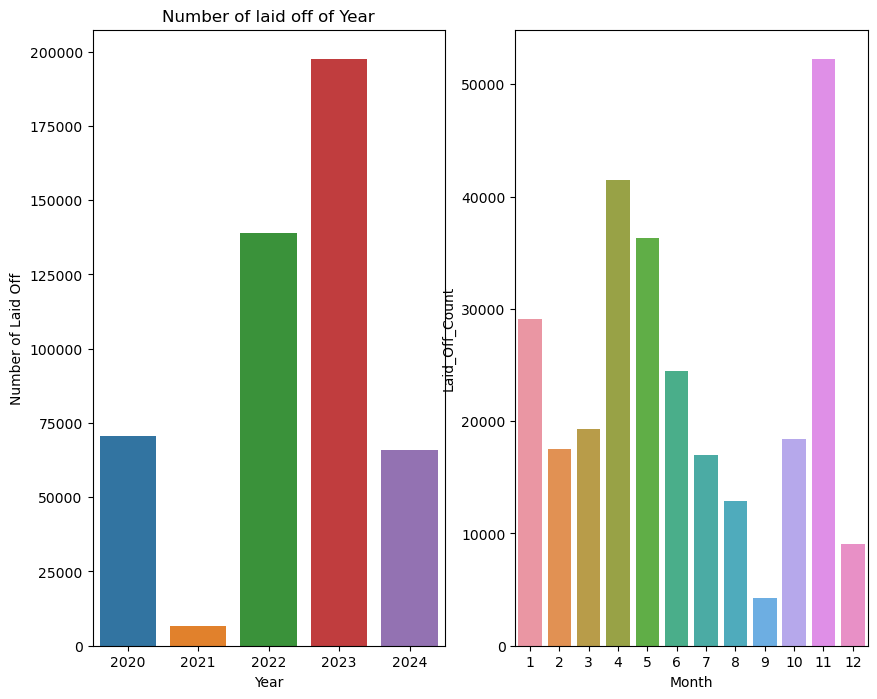

In [40]:
plt.figure(figsize=(9,8))

fig, ax = plt.subplots(1,2 , figsize=(10,8))#sharex and sharey )

ax[0] = sns.barplot(data = df.groupby('Year')['Laid_Off_Count'].sum().sort_values(ascending=True).reset_index(),
            y = 'Laid_Off_Count', x='Year', ax = ax[0])
ax[0].set(title='Number of laid off of Year', xlabel='Year', ylabel='Number of Laid Off')

ax[1] = sns.barplot(data = df.query("Year != 2023").groupby('Month')['Laid_Off_Count'].sum().sort_values(ascending=True).reset_index(),
            y = 'Laid_Off_Count', x='Month', ax = ax[1])
ax[1].set(xlabel='Month', ylabel='Laid_Off_Count')


The conclusion about the above graphs is that 2023 was the worst year for employees, and when it comes to the month(2023 not included,we know 2023 was the highest), we see that Nov was the highest month with the most layoffs.

In [41]:
df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Country,Year,Month,ID
0,True Anomaly,Denver,Aerospace,30.0,0.25,2024-04-25 00:00:00+00:00,158.0,United States,2024,4,1184
3,Freenome,SF Bay Area,Healthcare,100.0,0.20,2024-04-23 00:00:00+00:00,1400.0,United States,2024,4,437
4,Heureka Group,Prague,Retail,100.0,0.16,2024-04-23 00:00:00+00:00,NaN,Czech Republic,2024,4,520
7,The Good Glamm Group,New Delhi,Retail,150.0,0.15,2024-04-18 00:00:00+00:00,180.0,India,2024,4,1129
8,Showpad,Ghent,Marketing,50.0,0.10,2024-04-18 00:00:00+00:00,159.0,Belgium,2024,4,1012


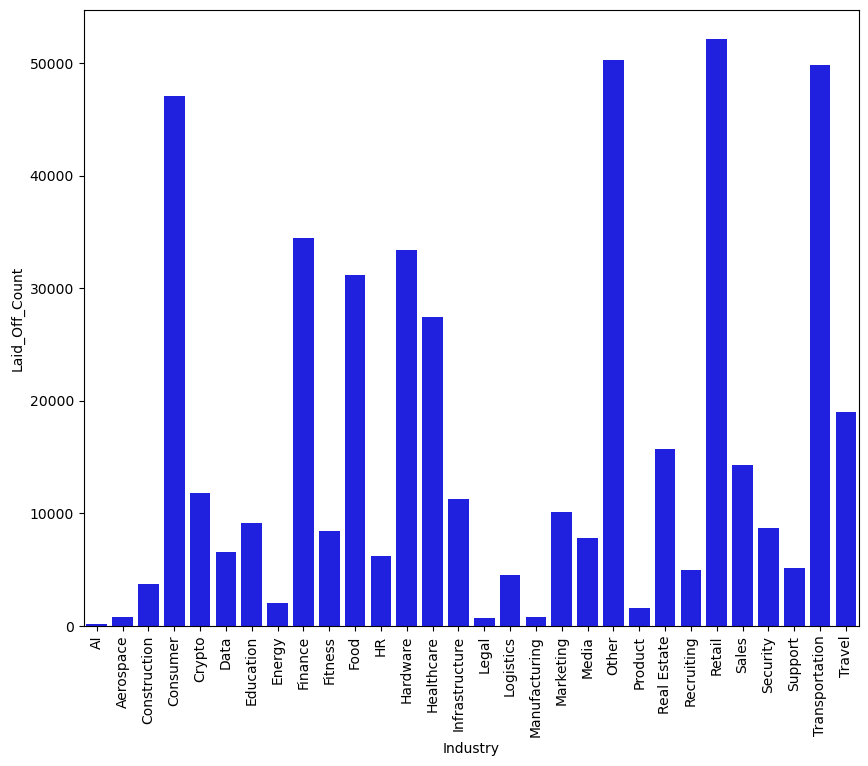

In [42]:
plt.figure(figsize=(10,8))
sns.barplot(data=df.groupby('Industry')['Laid_Off_Count'].sum().reset_index()
            ,x = 'Industry' , y = 'Laid_Off_Count', color='blue')

plt.xticks(rotation=90)
plt.show()

we see most of the lay off happened in the industry of Retail.

In [43]:
df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Country,Year,Month,ID
0,True Anomaly,Denver,Aerospace,30.0,0.25,2024-04-25 00:00:00+00:00,158.0,United States,2024,4,1184
3,Freenome,SF Bay Area,Healthcare,100.0,0.20,2024-04-23 00:00:00+00:00,1400.0,United States,2024,4,437
4,Heureka Group,Prague,Retail,100.0,0.16,2024-04-23 00:00:00+00:00,NaN,Czech Republic,2024,4,520
7,The Good Glamm Group,New Delhi,Retail,150.0,0.15,2024-04-18 00:00:00+00:00,180.0,India,2024,4,1129
8,Showpad,Ghent,Marketing,50.0,0.10,2024-04-18 00:00:00+00:00,159.0,Belgium,2024,4,1012


let's find out which country has the most laid off in 2023

it seems the answer is the USA

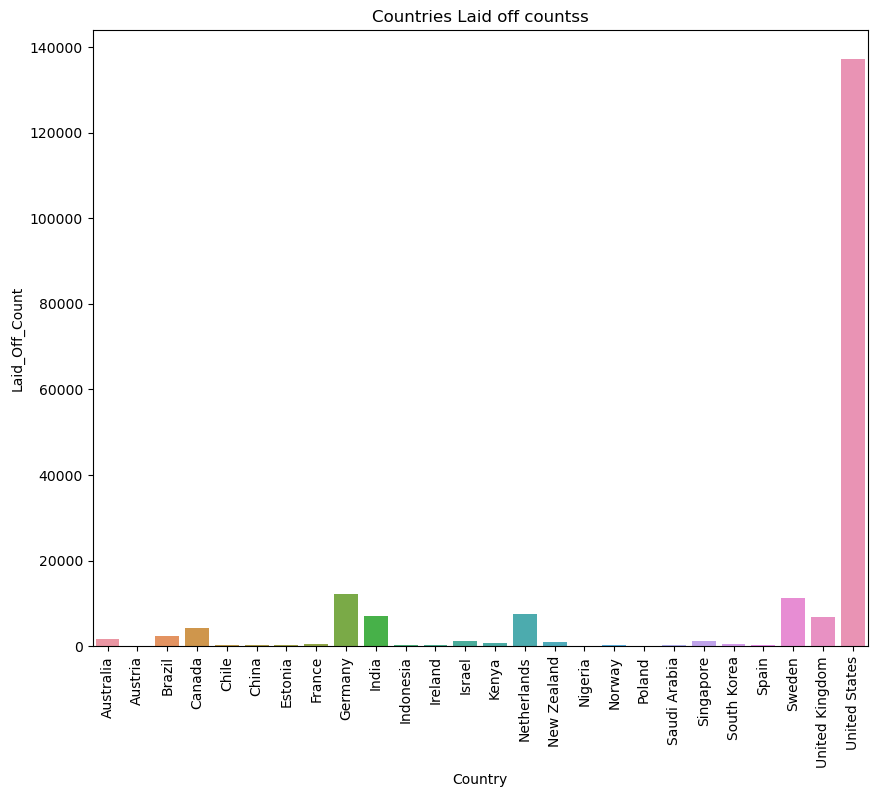

In [44]:
plt.figure(figsize=(10,8))

g = sns.barplot(data= df.query("Year == 2023").groupby('Country')['Laid_Off_Count'].sum().reset_index(),
             x='Country', y = 'Laid_Off_Count')

plt.xticks(rotation=90)
g.set(title="Countries Laid off countss", xlabel='Country')
plt.show()


lets see top 10 companies that has the most layoffs

In [45]:
df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Country,Year,Month,ID
0,True Anomaly,Denver,Aerospace,30.0,0.25,2024-04-25 00:00:00+00:00,158.0,United States,2024,4,1184
3,Freenome,SF Bay Area,Healthcare,100.0,0.20,2024-04-23 00:00:00+00:00,1400.0,United States,2024,4,437
4,Heureka Group,Prague,Retail,100.0,0.16,2024-04-23 00:00:00+00:00,NaN,Czech Republic,2024,4,520
7,The Good Glamm Group,New Delhi,Retail,150.0,0.15,2024-04-18 00:00:00+00:00,180.0,India,2024,4,1129
8,Showpad,Ghent,Marketing,50.0,0.10,2024-04-18 00:00:00+00:00,159.0,Belgium,2024,4,1012


In [54]:
countries = df.groupby(['Country','Year'])['Laid_Off_Count'].sum().reset_index().head(10)
countries

,Country,Year,Laid_Off_Count
0,Argentina,2022,283.0
1,Australia,2020,96.0
2,Australia,2022,1088.0
3,Australia,2023,1702.0
4,Australia,2024,60.0
5,Austria,2022,270.0
6,Austria,2023,70.0
7,Belgium,2024,50.0
8,Brazil,2020,2754.0
9,Brazil,2022,4227.0


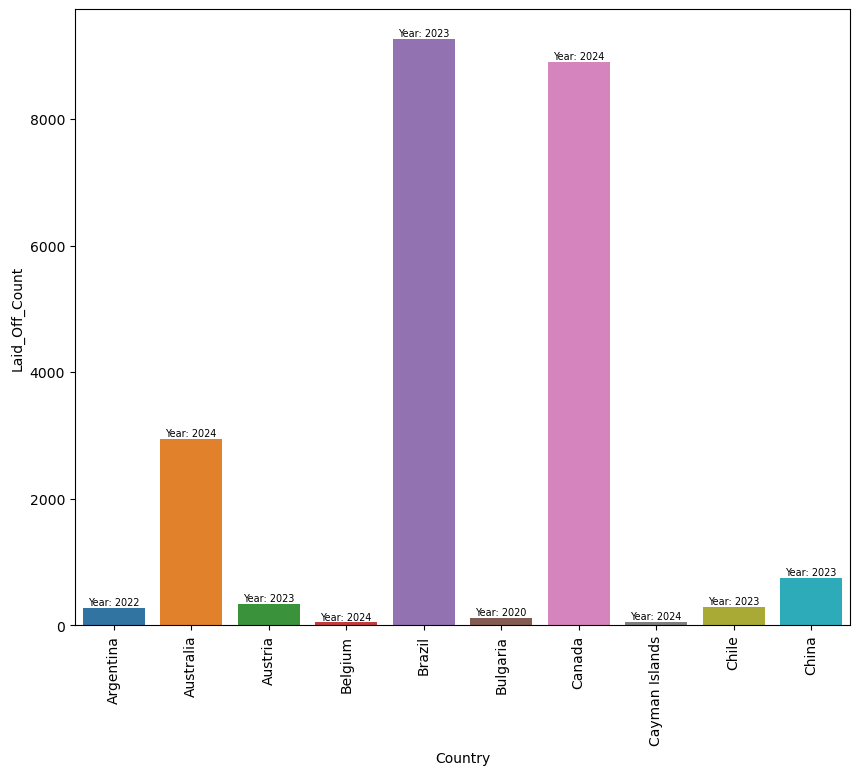

In [64]:
countries = df.groupby(['Country'])['Laid_Off_Count'].sum().reset_index().head(10)

#plt.figure(figsize=(10,8))

fix , ax = plt.subplots(figsize=(10,8))

sns.barplot(data=countries, x = 'Country', y = 'Laid_Off_Count', ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# to add year in the code:
for i, row in countries.iterrows():
    country = row['Country']
    year = df[df['Country'] == country]['Year'].values[0]
    ax.annotate(f'Year: {year}', xy=(i, row['Laid_Off_Count']), xytext=(i, row['Laid_Off_Count']),
                ha='center', va='bottom', fontsize=7, color='black')

plt.show()